## MACD Strategy

### Final Project of Group7

Short term EMA: ema_5m, 5-trading-days exponentially moving average, ema(5m) = ema(last 5m) \* 3 / 5 + current price \* 2 / 5

Long term EMA: ema_20m, 20-trading-days exponentially moving average, ema(20m) = ema(last 20m) \* 18 / 20 + current price \* 2 / 20

DIF: dif = ema_5m - ema_20m

DEA(t) = DIF(t-1) \* 8 / 10 + DIF(t) \* 2 / 10

MACD = DIF - DEA

Trading Signals:

(1) MACD(t-1) < 0, MACD(t) > 0: buy

(2) MACD(t-1) > 0, MACD(t) < 0: sell

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pandas_datareader as pdr
%matplotlib inline

In [2]:
data = pdr.get_data_yahoo('^GSPC',start = '2015-04-30', end = '2020-02-28')
data = data.reset_index()
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-04-30,2105.520020,2077.590088,2105.520020,2085.510010,4509680000,2085.510010
1,2015-05-01,2108.409912,2087.379883,2087.379883,2108.290039,3379390000,2108.290039
2,2015-05-04,2120.949951,2110.229980,2110.229980,2114.489990,3091580000,2114.489990
3,2015-05-05,2115.239990,2088.459961,2112.629883,2089.459961,3793950000,2089.459961
4,2015-05-06,2098.419922,2067.929932,2091.260010,2080.149902,3792210000,2080.149902


Construct time list

In [3]:
time_list = data["Date"]
price = data["Close"]
volume = data["Volume"]
print(len(time_list))

1217


C:\Users\enjoy\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


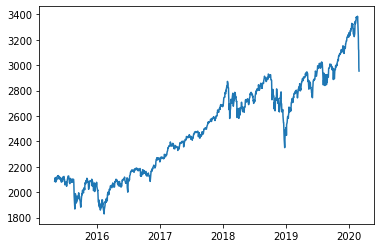

In [4]:
plt.plot(time_list, price)

Calculate EMA5M and EMA20M

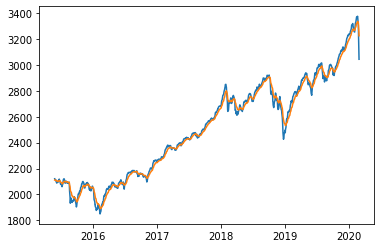

In [5]:
tmp_sum = 0
M = len(time_list)
EMA5M = []
for i in range(5):
    tmp_sum += price[i+15]
EMA5M.append(tmp_sum/5)
for i in range(20,M):
    EMA5M.append(EMA5M[-1] * 0.6 + price[i] * 0.4)

tmp_sum = 0
EMA20M = []
for i in range(20):
    tmp_sum += price[i]
EMA20M.append(tmp_sum/20)
for i in range(20,M):
    EMA20M.append(EMA20M[-1] * 0.9 + price[i] * 0.1)
# EMA5M = EMA5M[(len(EMA5M)-len(EMA20M)):]
plt.plot(time_list[(M-len(EMA5M)):], EMA5M)
plt.plot(time_list[(M-len(EMA5M)):], EMA20M)

DIF

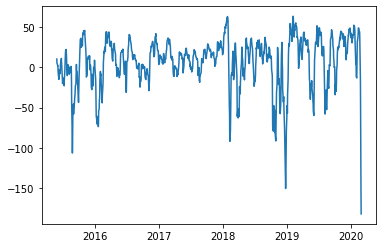

In [6]:
DIF = []
for i in range(len(EMA5M)):
    DIF.append(EMA5M[i] - EMA20M[i])
plt.plot(time_list[(M-len(EMA5M)):], DIF)

DEA

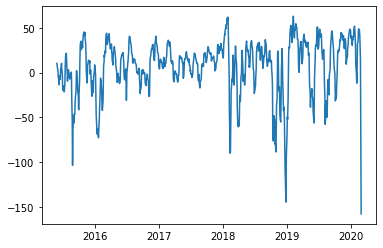

In [7]:
DEA = [DIF[0]]
for i in range(1,len(DIF)):
    DEA.append(DIF[i-1] * 0.8 + DIF[i] * 0.2)
plt.plot(time_list[(M-len(DEA)):], DEA)

MACD

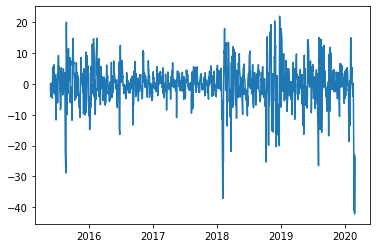

In [8]:
MACD = []
# DIF = DIF[1:]
for i in range(len(DIF)):
    MACD.append(DIF[i]-DEA[i])
plt.plot(time_list[(M-len(MACD)):], MACD)

Trading signal and PNL

In [9]:
volume = 100
signal = [0]*len(MACD)
time_list1 = time_list[(M-len(MACD)):]
position = [0] *len(MACD)
for i in range(1,len(time_list1)):
    if MACD[i-1] > 0 and MACD[i] < 0:
        signal[i] = -1
    elif MACD[i-1] < 0 and MACD[i] > 0:
        signal[i] = 1
price1 = price[(M-len(MACD)):].tolist()
PNL = [0]*len(signal)

for i in range(1,len(signal)):
    if signal[i] == -1:
        PNL[i] = PNL[i-1] + price1[i] * 100
        position[i] = position[i-1] - 100
    elif signal[i] == 1:
        PNL[i] = PNL[i-1] - price1[i] * 100
        position[i] = position[i-1] + 100
    else:
        PNL[i] = PNL[i-1]
        position[i] = position[i-1]

PNL Plot

Final PNL is 56307$


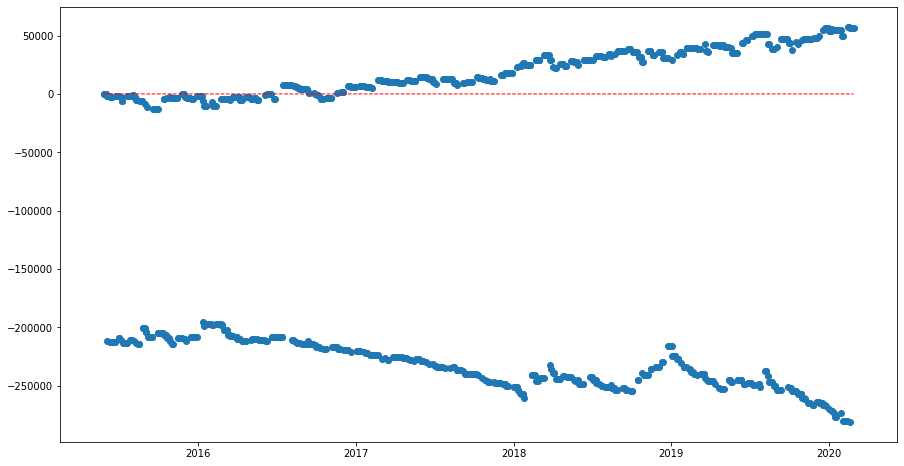

In [10]:
plt.figure(figsize = (15,8))
plt.scatter(time_list1,PNL)
plt.plot(time_list1, [0]*len(time_list1), 'r--', linewidth = 1.0)
print("Final PNL is "+str(int(PNL[-1]))+"$")

Profit_history Plot

In [11]:
profit_history = np.array(PNL) + np.array(position) * np.array(price1)

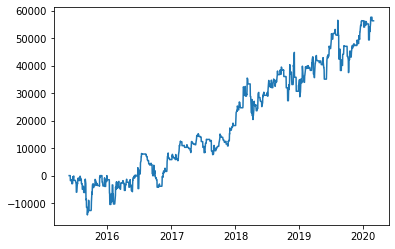

In [12]:
plt.plot(time_list1, profit_history)

Show the profit between 2020/1/1 to 2020/2/28

In [13]:
profit = profit_history[time_list1 > datetime(2020, 1, 1)]
print(profit[-1]-profit[1])

2281.005859375
